#Fraud Detection Example

In [0]:
# Import libraries
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,129911.0,2.042662,-0.070113,-1.857773,0.244234,0.455966,-0.349493,-0.088198,0.081461,0.588377,-0.152530,0.531666,-0.421078,-2.181529,-0.220433,-0.182990,0.646884,0.294626,0.469487,0.400265,-0.282465,-0.352370,-1.045869,0.322746,0.065735,-0.337478,0.185609,-0.078234,-0.048991,1.98,0
1,56784.0,1.105587,0.175916,0.428929,1.277038,-0.038610,0.165003,0.020626,0.093183,-0.067516,0.021090,1.269993,1.561485,0.432713,0.135522,-0.864022,-0.555043,-0.024880,-0.559395,-0.084267,-0.119777,-0.037554,0.103853,-0.090249,0.056843,0.652146,-0.333195,0.038623,0.008751,17.17,0
2,69440.0,1.153212,-0.094069,0.370299,0.609667,-0.207152,0.261253,-0.237307,0.201155,0.308518,-0.055361,0.866351,0.837049,-0.652903,0.251066,-0.571694,-0.255116,-0.026859,-0.488580,0.274694,-0.150060,-0.176037,-0.370057,-0.010535,-0.278807,0.372802,0.302421,-0.015368,-0.003775,14.86,0
3,93521.0,-0.194827,-0.212023,2.125750,-1.922349,-0.764845,-0.249667,-0.090746,-0.439896,-1.024847,0.580612,0.197169,-3.272540,3.140520,0.412822,-0.614647,-1.045409,1.387718,0.295937,0.385767,-0.052729,-0.313775,0.012911,-0.340263,-0.050482,0.384505,0.020061,-0.106493,-0.163113,29.00,0
4,154172.0,0.439804,1.343752,-1.364688,1.309440,0.340152,-0.412269,0.200711,0.159247,-0.200281,-0.327044,-0.439751,0.393308,0.895665,-0.733168,1.385580,-0.896994,1.620735,0.266917,2.472881,0.049756,-0.106938,-0.260220,0.356932,0.504631,-1.333203,-0.386510,-0.186872,0.049028,9.99,0


In [19]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(f'Total os frauds: {len(frauds)}')
print(f'Total os non frauds: {len(non_frauds)}')

Total os frauds: 492
Total os non frauds: 284315


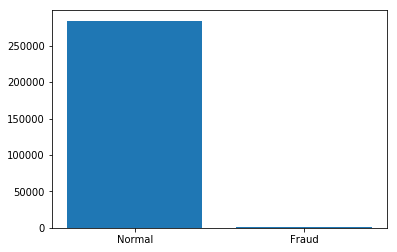

In [43]:
label = ['Normal', 'Fraud']
ntr = [len(non_frauds), len(frauds)]
index = np.arange(len(label))
plt.bar(index, ntr)
plt.xticks(index, label, fontsize=10)
plt.show()

In [0]:
# Spliting the data to train and test
X = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [58]:
model = linear_model.LogisticRegression(C=1e5)
model.fit(X_train, y_train)
print('Score:', model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9988483469565461


In [0]:
y_predicted = np.array(logistic.predict(X_test))
predicted_frauds = y_predicted[y_predicted == 1]
predicted_non_frauds = y_predicted[y_predicted == 0]

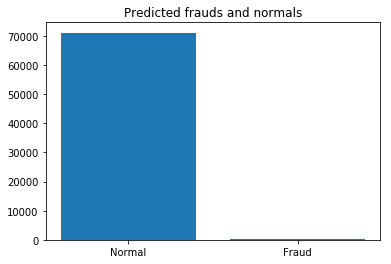

In [52]:
label = ['Normal', 'Fraud']
ntr = [len(predicted_non_frauds), len(predicted_frauds)]
index = np.arange(len(label))
plt.bar(index, ntr)
plt.title('Predicted frauds and normals')
plt.xticks(index, label, fontsize=10)
plt.show()